<a href="https://colab.research.google.com/github/daherhammoura1/Data-Science-Essentials/blob/main/DatascienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

# Download Tesla stock data
tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31')

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [11]:
!pip install selenium

In [12]:
!apt-get update
!apt install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,314 kB]
Get:14 https://r2u.stat.illinois.edu

In [13]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# Set Chrome options to run in headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Initialize the WebDriver
driver = webdriver.Chrome(options=chrome_options)

# Now navigate to the URL
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
driver.get(url)

# Extract page source and use BeautifulSoup to parse it
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Find the revenue table and extract the data
tables = soup.find_all('table')
tesla_revenue = pd.read_html(str(tables))[1]

# Clean and display the data
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)
tesla_revenue.tail()

# Close the driver after scraping
driver.quit()


<ipython-input-13-fea61bcf3735>:23: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables))[1]


In [3]:
gme_data = yf.download('GME', start='2010-01-01', end='2023-12-31')

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
gme_data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5.5175,5.7375,5.5000,5.7250,3.854642,26702800
1,2010-01-05,5.7275,5.9350,5.7250,5.8800,3.959005,21269600
2,2010-01-06,5.8650,6.0250,5.8050,6.0075,4.044850,21471200
3,2010-01-07,5.0025,5.2925,4.8550,5.1150,3.443930,164761200
4,2010-01-08,5.1600,5.3075,5.0575,5.0725,3.415316,47872400


In [4]:
# Scrape the GameStop revenue data from MacroTrends
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
html = requests.get(url).text

# Use BeautifulSoup to parse the HTML
soup = BeautifulSoup(html, 'html.parser')

# Extract the revenue data
tables = soup.find_all('table')
gme_revenue = pd.read_html(str(tables))[1]

# Clean the data
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)

# Display the last five rows
gme_revenue.tail()

<ipython-input-4-dc8f372c42e5>:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(tables))[1]


ValueError: No tables found

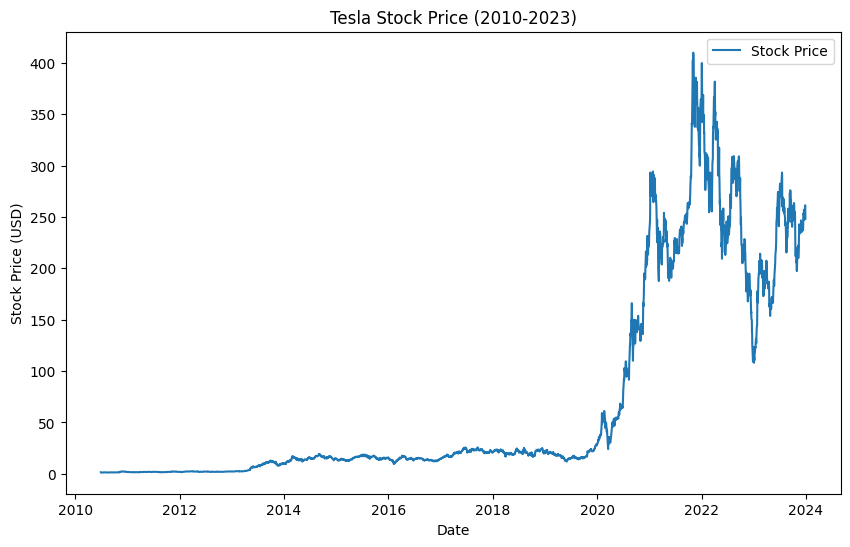

In [5]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.show()

# Plot Tesla stock data
make_graph(tesla_data, 'Tesla Stock Price (2010-2023)')

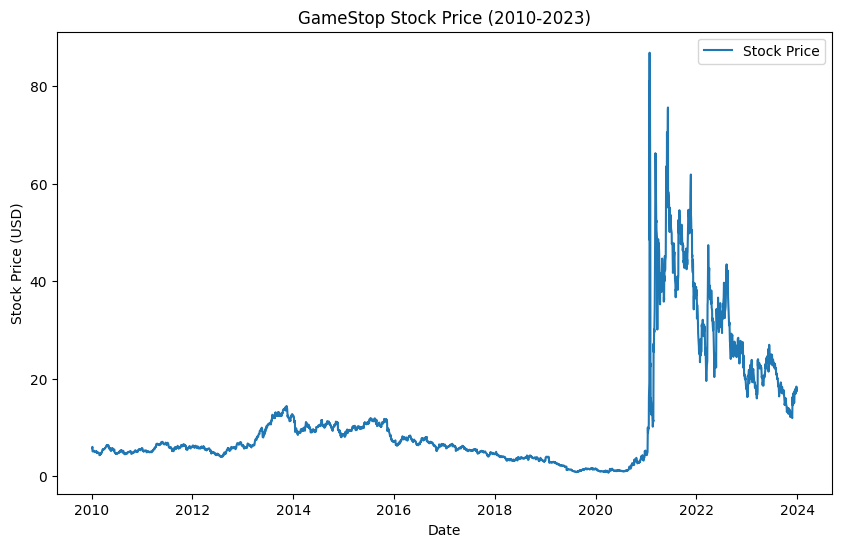

In [6]:
# Plot GameStop stock data
make_graph(gme_data, 'GameStop Stock Price (2010-2023)')